# Tensorflow
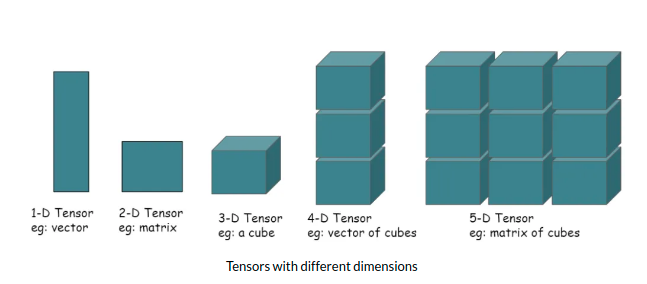

- https://www.tensorflow.org/
- https://playground.tensorflow.org/


## Installation and Setup

Install TensorFlow via pip (if not already installed):

```bash
pip install tensorflow
```

> **Note:**
> - Google Colab already has TensorFlow installed.
> - In a Jupyter Notebook, you can run `!pip install tensorflow` in a cell.

In [ ]:
!pip install tensorflow # tensorflow is quite heavy, install may take a while

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, optimizers


from sklearn.model_selection import train_test_split

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


## Understanding Tensors

Tensors are multi-dimensional arrays and are the basic data structure in TensorFlow.

In [2]:
# Create a constant tensor
tensor_a = tf.constant([[1, 2], [3, 4]])
print("Tensor A:\n", tensor_a)

# Element-wise addition
tensor_b = tf.constant([[5, 6], [7, 8]])
sum_tensors = tf.add(tensor_a, tensor_b)
print("Sum of A and B:\n", sum_tensors)

Tensor A:
 tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
Sum of A and B:
 tf.Tensor(
[[ 6  8]
 [10 12]], shape=(2, 2), dtype=int32)


## Loading and Preparing the MNIST Dataset

The MNIST dataset contains 70,000 grayscale images (28x28 pixels) of handwritten digits (0–9). We'll load the dataset from Keras.

In [3]:
# Load MNIST data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

print("Full training set shape:", X_train_full.shape, y_train_full.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Full training set shape: (60000, 28, 28) (60000,)
Test set shape: (10000, 28, 28) (10000,)


In [4]:
600/7

85.71428571428571

In [5]:
print(X_train_full.max(), X_train_full.min())
print(X_test.max(), X_test.min())

255 0
255 0


## Data Exploration and Visualization

Let's explore the data by checking the label distribution and visualizing some sample images.

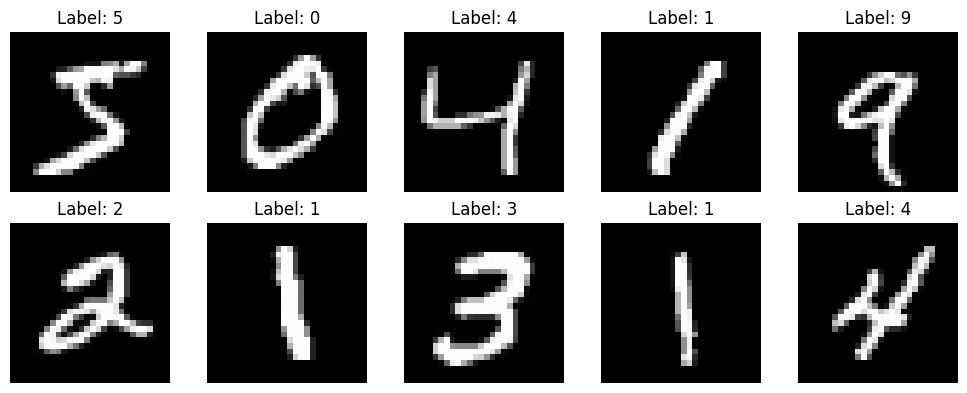

In [6]:
# Visualize some sample images from the training set
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_full[i], cmap='gray')
    plt.title(f"Label: {y_train_full[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
# Display label distribution in the full training set
unique, counts = np.unique(y_train_full, return_counts=True)
print("Label distribution in full training set:")
for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count} samples | {count / len(y_train_full) * 100:.2f}%")

Label distribution in full training set:
Digit 0: 5923 samples | 9.87%
Digit 1: 6742 samples | 11.24%
Digit 2: 5958 samples | 9.93%
Digit 3: 6131 samples | 10.22%
Digit 4: 5842 samples | 9.74%
Digit 5: 5421 samples | 9.04%
Digit 6: 5918 samples | 9.86%
Digit 7: 6265 samples | 10.44%
Digit 8: 5851 samples | 9.75%
Digit 9: 5949 samples | 9.92%


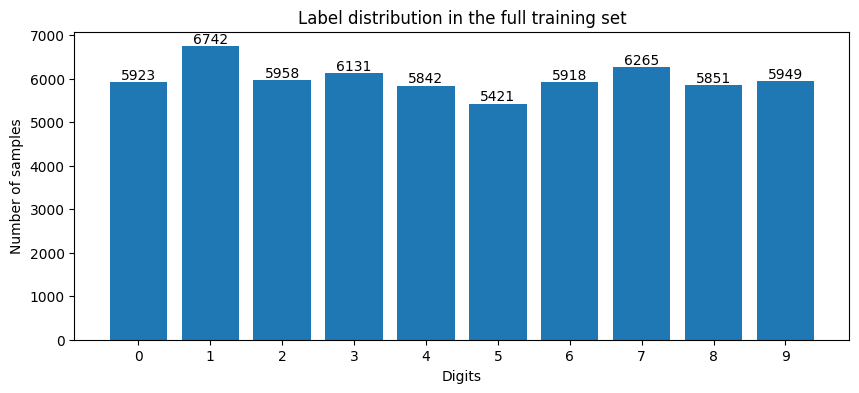

In [8]:

# bar plot of label distribution
plt.figure(figsize=(10, 4))
plt.bar(unique, counts)
plt.xlabel('Digits')
plt.ylabel('Number of samples')
plt.title('Label distribution in the full training set')
plt.xticks(unique)
# add number of samples on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

## Train/Validation/Test Split and Preprocessing

We split the full training set into a training set and a validation set (e.g., 80% training, 20% validation) and then preprocess the images by normalizing pixel values and flattening each image into a 784-dimensional vector.

In [9]:
# Split the full training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=1
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (48000, 28, 28)
Validation set shape: (12000, 28, 28)


In [10]:
# Flatten images (28x28 -> 784) and normalize pixel values to [0, 1]
def preprocess_images(X):
    X = X.reshape(-1, 28 * 28)  # Flatten images
    return X / 255.0           # Normalize

X_train = preprocess_images(X_train)
X_val   = preprocess_images(X_val)
X_test  = preprocess_images(X_test)

print("Flattened training set shape:", X_train.shape)
print("Flattened validation set shape:", X_val.shape)
print("Flattened test set shape:", X_test.shape)

Flattened training set shape: (48000, 784)
Flattened validation set shape: (12000, 784)
Flattened test set shape: (10000, 784)


In [11]:
# check whether the data is normalized
print("Min pixel value:", X_train.min())
print("Max pixel value:", X_train.max())
# test and val
print("Min pixel value:", X_val.min())
print("Max pixel value:", X_val.max())
# test
print("Min pixel value:", X_test.min())
print("Max pixel value:", X_test.max())

Min pixel value: 0.0
Max pixel value: 1.0
Min pixel value: 0.0
Max pixel value: 1.0
Min pixel value: 0.0
Max pixel value: 1.0


## Building a Neural Network

We now define a simple feed-forward neural network with an input layer of size 784, two hidden layers, and an output layer with 10 neurons (one per digit).

### Config

In [12]:
NEURONS_LAYER_1 = 32
NEURONS_LAYER_2 = 32
DROPOUT = 0.2
L2_REGULARIZATION = 0.001
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 128

# power of 2s - https://datascience.stackexchange.com/questions/20179/what-is-the-advantage-of-keeping-batch-size-a-power-of-2/20193

In [13]:
# Basic model without regularization (for comparison)
model = keras.Sequential([
    layers.Dense(NEURONS_LAYER_1, activation='relu', input_shape=(28*28,)),
    layers.Dense(NEURONS_LAYER_2, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

c:\Users\hayk_\.conda\envs\thesis\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,506 (103.54 KB)

 Trainable params: 26,506 (103.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# plot model architecture
# pip install pydot and we also need graphviz
keras.utils.plot_model(model, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


## Adding Regularization and Dropout

To reduce overfitting, we add L2 weight regularization and dropout layers. This version of the model will be used for training.

In [15]:
model_reg_dropout = keras.Sequential([
    layers.Dense(NEURONS_LAYER_1, activation='relu', input_shape=(784,),
                 kernel_regularizer=regularizers.l2(L2_REGULARIZATION)),
    layers.Dropout(DROPOUT),  # Drop 20% of neurons during training
    layers.Dense(NEURONS_LAYER_2, activation='relu', 
                 kernel_regularizer=regularizers.l2(L2_REGULARIZATION)),
    layers.Dropout(DROPOUT),
    layers.Dense(10, activation='softmax')
])

model_reg_dropout.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,506 (103.54 KB)

 Trainable params: 26,506 (103.54 KB)

 Non-trainable params: 0 (0.00 B)

## Compiling the Model

We compile the model by specifying the loss function, optimizer, and metrics. Since the labels are integers (0–9), we use `sparse_categorical_crossentropy`.

**Notes:**
- When you call the compile() method on a Keras model, you can pass a list (or a single item). These metrics are functions or objects that compute performance measures during training and evaluation. They don't affect the training process (which is driven by the loss function) but serve as additional diagnostics to monitor how well your model is performing.
- Adam - https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [16]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
    # optimizers="adam"
    metrics=['accuracy'],
)

model_reg_dropout.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
    metrics=['accuracy'],
)


## Training the Model

We train the model on the training set while validating on the validation set.

In [21]:
model_to_use = model_reg_dropout

early_stopping = keras.callbacks.EarlyStopping(patience=5, 
                                            #    min_delta=0.1,
                                               restore_best_weights=True)


In [ ]:
history = model_to_use.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping, 
               keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3, verbose=1),
               keras.callbacks.ModelCheckpoint('mnist_model.keras', save_best_only=True)],
    verbose=1, 
)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5877 - loss: 1.3461 - val_accuracy: 0.9082 - val_loss: 0.4046 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8665 - loss: 0.5364 - val_accuracy: 0.9256 - val_loss: 0.3398 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8903 - loss: 0.4717 - val_accuracy: 0.9362 - val_loss: 0.3104 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8999 - loss: 0.4295 - val_accuracy: 0.9413 - val_loss: 0.2932 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9047 - loss: 0.4010 - val_accuracy: 0.9438 - val_loss: 0.2787 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9136 - loss: 0.3808 - val_accuracy: 0.9463 - val_loss: 0.2693 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9178 - loss: 0.3636

## Training plots

In [24]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

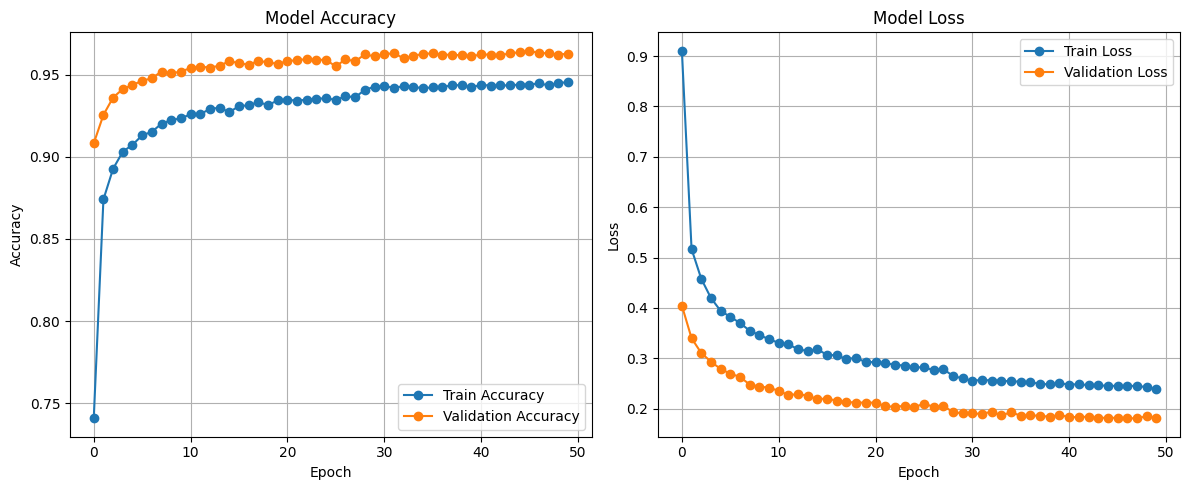

In [25]:
plt.figure(figsize=(12, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

## Evaluating the Model

In [26]:
# Evaluate model on test set
test_loss, test_accuracy = model_to_use.evaluate(X_test, y_test, verbose=0)

train_loss, train_accuracy = model_to_use.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = model_to_use.evaluate(X_val, y_val, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f} | Validation Accuracy: {val_accuracy:.4f} | Test Accuracy: {test_accuracy:.4f}")
print(f"Train Loss: {train_loss:.4f} | Validation Loss: {val_loss:.4f} | Test Loss: {test_loss:.4f}")

Train Accuracy: 0.9764 | Validation Accuracy: 0.9632 | Test Accuracy: 0.9655
Train Loss: 0.1431 | Validation Loss: 0.1806 | Test Loss: 0.1765


## Making Predictions

We use the trained model to predict the class labels on the test set.

In [27]:
predictions = model_to_use.predict(X_test)
print(predictions[1])
predicted_classes = np.argmax(predictions, axis=1)

print("Predicted digit labels (first 10):", predicted_classes[:10])
print("True digit labels (first 10):     ", y_test[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[1.62349061e-05 2.36004984e-04 9.96365666e-01 3.16851377e-03
 1.03499834e-10 5.46348474e-06 1.52672346e-05 1.15173293e-08
 1.92794017e-04 1.11191507e-10]
Predicted digit labels (first 10): [7 2 1 0 4 1 4 9 5 9]
True digit labels (first 10):      [7 2 1 0 4 1 4 9 5 9]


## Misclassified images

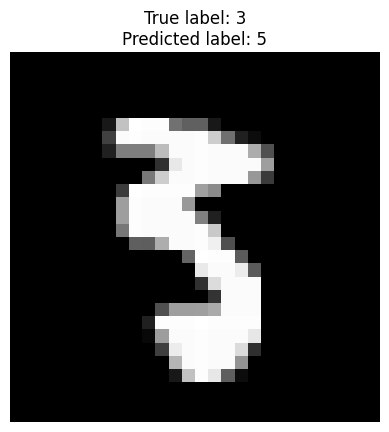

In [30]:
# Display some misclassified images
misclassified_idx = np.where(predicted_classes != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
plt.title(f"True label: {y_test[i]}\nPredicted label: {predicted_classes[i]}")
plt.axis('off')
plt.show()

In [ ]:
!pip install seaborn

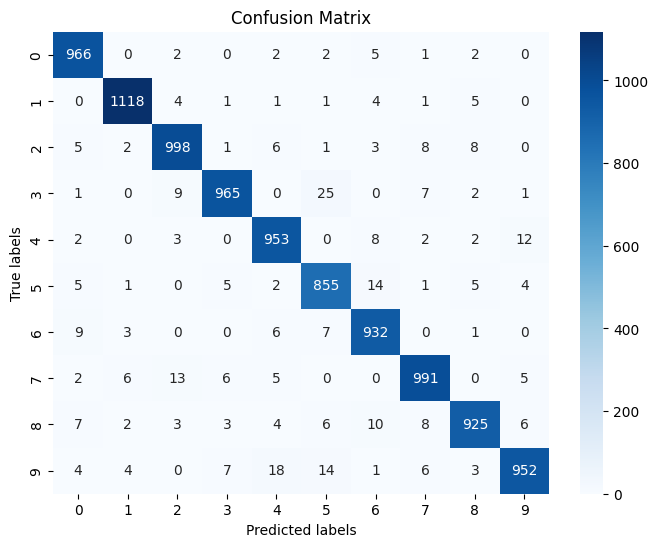

In [31]:
import seaborn as sns

# Get matrix of confusion
confusion_matrix = tf.math.confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


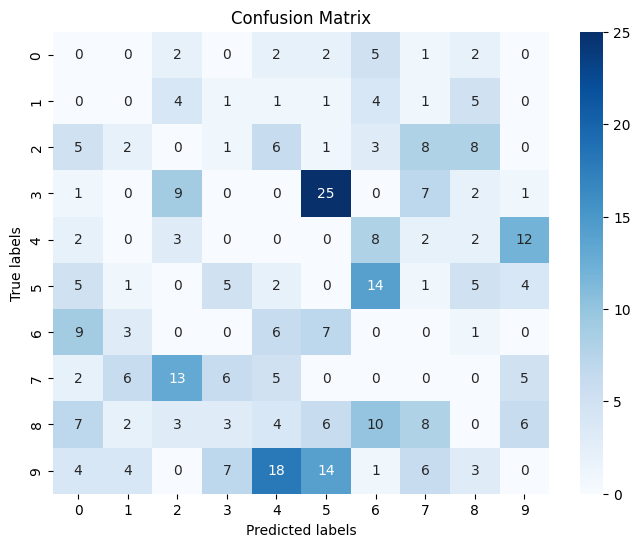

In [32]:
import seaborn as sns

# Convert confusion matrix to NumPy array and set the diagonal to zero
confusion_matrix_np = confusion_matrix.numpy()
np.fill_diagonal(confusion_matrix_np, 0)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_np, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## Saving and Loading the Model

We save the trained model to disk and then demonstrate how to load it back.

In [33]:
# Saving the model
model_reg_dropout.save("mnist_model.h5")
print("Model saved to mnist_model.h5")

# Loading the model
loaded_model = keras.models.load_model("mnist_model.h5")
print("Loaded model from mnist_model.h5")

# Verify loaded model performance
loaded_loss, loaded_accuracy = loaded_model.evaluate(X_test, y_test, verbose=0)
print("Loaded model Test Loss:", loaded_loss)
print("Loaded model Test Accuracy:", loaded_accuracy)

Model saved to mnist_model.h5
Loaded model from mnist_model.h5
Loaded model Test Loss: 0.17650355398654938
Loaded model Test Accuracy: 0.965499997138977


# Experiment tracking


Experiment tracking is the process of logging and visualizing important information about your model training—such as loss, accuracy, hyperparameters, and even model artifacts—to help you compare different runs and reproduce results.

Two of the most popular tools for experiment tracking are:

#### TensorBoard
Developed by the TensorFlow team
- [TensorBoard Documentation](https://www.tensorflow.org/tensorboard)

#### Weights & Biases (W&B)
Some Armenian works there
- [Weights & Biases Homepage](https://www.wandb.com/)
#### Aim hub
Made in Armenia
- [Aim hub Homepage](https://aimhub.ai/)

## Next Steps and Further Reading

- **Experiment with Architecture:** Try adding more layers or neurons.
- **Hyperparameter Tuning:** Adjust learning rates, batch sizes, or regularization strengths.
- **Advanced Models:** Explore Convolutional Neural Networks (CNNs) for image data.
- **Additional Techniques:** Consider using early stopping, initialization or batch normalization for improved performance.
- **Documentation:** Visit the [TensorFlow documentation](https://www.tensorflow.org/api_docs) for more details.